In [ ]:
#Project 01 : Income Groups

In [1120]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [1121]:
#loading/preparing data

header_name=['Age','Employment type','Weighting factor','Level of education','Schooling/training period',
              'Marital status','Employment area', 'Partnership','Ethnicity', 'Gender',
              'Gains on financial assets', 'Losses on financial assets', 
              'Weekly working time', 'Country  of  birth', 'Income']
data = pd.read_csv('einkommen.train')
data.columns = header_name
data.head(10)


,Age,Employment type,Weighting factor,Level of education,Schooling/training period,Marital status,Employment area,Partnership,Ethnicity,Gender,Gains on financial assets,Losses on financial assets,Weekly working time,Country of birth,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [1123]:
print(data.shape)
data.info()
#data.describe()

(29999, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         29999 non-null  int64 
 1   Employment type             29999 non-null  object
 2   Weighting factor            29999 non-null  int64 
 3   Level of education          29999 non-null  object
 4   Schooling/training period   29999 non-null  int64 
 5   Marital status              29999 non-null  object
 6   Employment area             29999 non-null  object
 7   Partnership                 29999 non-null  object
 8   Ethnicity                   29999 non-null  object
 9   Gender                      29999 non-null  object
 10  Gains on financial assets   29999 non-null  int64 
 11  Losses on financial assets  29999 non-null  int64 
 12  Weekly working time         29999 non-null  int64 
 13  Country  of  birth          29999 

In [1124]:
#Data preprocessing: 

# Handeling missing values 

data[data==' ?'].count()   # counting missing values for each feature

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Age                               0
Employment type                1677
Weighting factor                  0
Level of education                0
Schooling/training period         0
Marital status                    0
Employment area                1682
Partnership                       0
Ethnicity                         0
Gender                            0
Gains on financial assets         0
Losses on financial assets        0
Weekly working time               0
Country  of  birth              539
Income                        25000
dtype: int64

In [1127]:
#missing values : Employment Type

#counting values of each category in 'Employment type'

most_common_type= data['Employment type'].value_counts().sort_values(ascending=False)
print(most_common_type)


# replacing missing values in 'Employment type' with the most common category ('Private') 
data['Employment type'] = data['Employment type'].replace(' ?' ,' Private')

 Private             22578
 Self-emp-not-inc     2363
 Local-gov            1928
 State-gov            1188
 Self-emp-inc         1037
 Federal-gov           887
 Without-pay            13
 Never-worked            5
Name: Employment type, dtype: int64


In [1128]:
#counting values of each category in 'Employment area' 
most_common_area = data['Employment area'].value_counts().sort_values(ascending=False)
print(most_common_area)


#Replacing missing values in 'Employment area' with a new category ('Unknown')

data['Employment area'] = data['Employment area'].replace(' ?' ,' Unkown')


#Replacing missing values in 'Country  of  birth' with a new category ('Unknown')

data['Country  of  birth'] = data['Country  of  birth'].replace(' ?' ,' Unkown')
data['Country  of  birth'].unique()

 Prof-specialty       3802
 Craft-repair         3784
 Exec-managerial      3736
 Adm-clerical         3506
 Sales                3370
 Other-service        3044
 Machine-op-inspct    1846
 Unkown               1682
 Transport-moving     1473
 Handlers-cleaners    1252
 Farming-fishing       913
 Tech-support          856
 Protective-serv       583
 Priv-house-serv       144
 Armed-Forces            8
Name: Employment area, dtype: int64


array([' United-States', ' Cuba', ' Jamaica', ' India', ' Unkown',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [1129]:
data[data==' ?'].count()   # checking if the missing values were replaced

Age                               0
Employment type                   0
Weighting factor                  0
Level of education                0
Schooling/training period         0
Marital status                    0
Employment area                   0
Partnership                       0
Ethnicity                         0
Gender                            0
Gains on financial assets         0
Losses on financial assets        0
Weekly working time               0
Country  of  birth                0
Income                        25000
dtype: int64

In [1130]:
# converting categorical nominal features to numerical with one hot encoding
new_data = data.drop(['Income'], axis = 1)


new_data = pd.get_dummies(new_data, columns = ['Employment type', 'Marital status','Employment area', 'Partnership',
                      'Ethnicity', 'Gender', 'Country  of  birth'])
new_data 
#new_data.info()




,Age,Weighting factor,Level of education,Schooling/training period,Gains on financial assets,Losses on financial assets,Weekly working time,Employment type_ Federal-gov,Employment type_ Local-gov,Employment type_ Never-worked,...,Country of birth_ Puerto-Rico,Country of birth_ Scotland,Country of birth_ South,Country of birth_ Taiwan,Country of birth_ Thailand,Country of birth_ Trinadad&Tobago,Country of birth_ United-States,Country of birth_ Unkown,Country of birth_ Vietnam,Country of birth_ Yugoslavia
0,50,83311,Bachelors,13,0,0,13,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,215646,HS-grad,9,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,11th,7,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,Bachelors,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,Masters,14,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,30,55481,Masters,14,0,0,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29995,48,119471,Assoc-voc,11,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,61,167347,Some-college,10,0,0,35,0,1,0,...,0,0,0,0,0,0,1,0,0,0
29997,41,184378,HS-grad,9,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1131]:
#converting categorical ordinal features  

data['Level of education'].unique()


edu_level = {' Preschool' :1 , ' 1st-4th': 2, ' 5th-6th': 3, ' 7th-8th': 4, ' 9th': 5, ' 10th': 6,
       ' 11th': 7, ' 12th': 8, ' HS-grad': 9, ' Prof-school': 10,' Assoc-voc': 11,
             ' Assoc-acdm': 12,' Some-college': 13,' Bachelors': 14, ' Masters': 15, ' Doctorate': 16 }

new_data['Level of education'] = data['Level of education'].map(edu_level)


new_data


,Age,Weighting factor,Level of education,Schooling/training period,Gains on financial assets,Losses on financial assets,Weekly working time,Employment type_ Federal-gov,Employment type_ Local-gov,Employment type_ Never-worked,...,Country of birth_ Puerto-Rico,Country of birth_ Scotland,Country of birth_ South,Country of birth_ Taiwan,Country of birth_ Thailand,Country of birth_ Trinadad&Tobago,Country of birth_ United-States,Country of birth_ Unkown,Country of birth_ Vietnam,Country of birth_ Yugoslavia
0,50,83311,14,13,0,0,13,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,215646,9,9,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,7,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,14,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,15,14,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,30,55481,15,14,0,0,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29995,48,119471,11,11,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,61,167347,13,10,0,0,35,0,1,0,...,0,0,0,0,0,0,1,0,0,0
29997,41,184378,9,9,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0


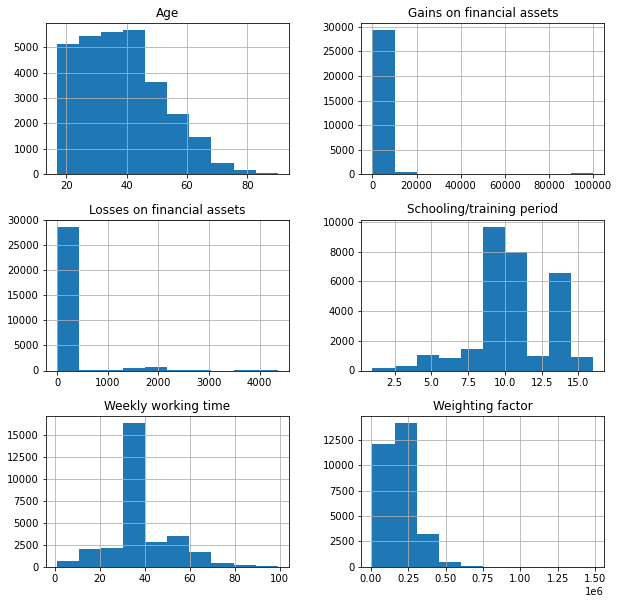

In [1132]:
#Data Normalisation

#selceting numerical features
numerics = data.select_dtypes(np.number)


#distribution of numerical features

numerics.hist(figsize=(10,10))
plt.show()



In [1133]:
# Data normalisation with Min-Max scaling 

from sklearn.preprocessing import MinMaxScaler    

numerics = data.select_dtypes(np.number)


scaler = MinMaxScaler()
new_data_scaled= pd.DataFrame(scaler.fit_transform(numerics), columns=numerics.columns)

new_data_scaled


,Age,Weighting factor,Schooling/training period,Gains on financial assets,Losses on financial assets,Weekly working time
0,0.452055,0.048238,0.800000,0.0,0.0,0.122449
1,0.287671,0.138113,0.533333,0.0,0.0,0.397959
2,0.493151,0.151068,0.400000,0.0,0.0,0.397959
3,0.150685,0.221488,0.800000,0.0,0.0,0.397959
4,0.273973,0.184932,0.866667,0.0,0.0,0.397959
...,...,...,...,...,...,...
29994,0.178082,0.029337,0.866667,0.0,0.0,0.448980
29995,0.424658,0.072796,0.666667,0.0,0.0,0.561224
29996,0.602740,0.105311,0.600000,0.0,0.0,0.346939
29997,0.328767,0.116878,0.533333,0.0,0.0,0.397959


In [1134]:
# replacing categories in 'Income' with binary values

income_dic={' <=50K': 0, ' >50K': 1, ' ?': ' ?'}
new_data['Income']=data['Income'].map(income_dic)
new_data

#new_data['Income'].unique()    


new_data = new_data.drop(['Age', 'Weighting factor', 'Schooling/training period', 
                          'Gains on financial assets', 'Losses on financial assets', 'Weekly working time'], axis = 1 )


new_data


,Level of education,Employment type_ Federal-gov,Employment type_ Local-gov,Employment type_ Never-worked,Employment type_ Private,Employment type_ Self-emp-inc,Employment type_ Self-emp-not-inc,Employment type_ State-gov,Employment type_ Without-pay,Marital status_ Divorced,...,Country of birth_ Scotland,Country of birth_ South,Country of birth_ Taiwan,Country of birth_ Thailand,Country of birth_ Trinadad&Tobago,Country of birth_ United-States,Country of birth_ Unkown,Country of birth_ Vietnam,Country of birth_ Yugoslavia,Income
0,14,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,9,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,14,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,15,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,?
29995,11,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,?
29996,13,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,?
29997,9,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,?


In [1135]:
#merging the two preprocessed dataframes

new_df = pd.merge(new_data_scaled, new_data, left_index=True, right_index=True)
new_df

#new_df.isnull().values.any()

,Age,Weighting factor,Schooling/training period,Gains on financial assets,Losses on financial assets,Weekly working time,Level of education,Employment type_ Federal-gov,Employment type_ Local-gov,Employment type_ Never-worked,...,Country of birth_ Scotland,Country of birth_ South,Country of birth_ Taiwan,Country of birth_ Thailand,Country of birth_ Trinadad&Tobago,Country of birth_ United-States,Country of birth_ Unkown,Country of birth_ Vietnam,Country of birth_ Yugoslavia,Income
0,0.452055,0.048238,0.800000,0.0,0.0,0.122449,14,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.287671,0.138113,0.533333,0.0,0.0,0.397959,9,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.493151,0.151068,0.400000,0.0,0.0,0.397959,7,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.150685,0.221488,0.800000,0.0,0.0,0.397959,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.273973,0.184932,0.866667,0.0,0.0,0.397959,15,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0.178082,0.029337,0.866667,0.0,0.0,0.448980,15,0,0,0,...,0,0,0,0,0,0,0,0,0,?
29995,0.424658,0.072796,0.666667,0.0,0.0,0.561224,11,0,0,0,...,0,0,0,0,0,0,0,0,0,?
29996,0.602740,0.105311,0.600000,0.0,0.0,0.346939,13,0,1,0,...,0,0,0,0,0,1,0,0,0,?
29997,0.328767,0.116878,0.533333,0.0,0.0,0.397959,9,0,0,0,...,0,0,0,0,0,1,0,0,0,?


In [1136]:
# Feature selection:

#Finding independet/important features(correlation, mutual information)

for_predict= new_df.loc[new_df['Income']== ' ?'] #25000 samples for predicting
comp_dataset = new_df.loc[new_df['Income']!= ' ?']  #5000 samples for train and test




x = comp_dataset[comp_dataset.columns[:-1]]
y = comp_dataset[comp_dataset.columns[-1]]
y=y.astype('int')
x.shape
y.shape



(4999,)

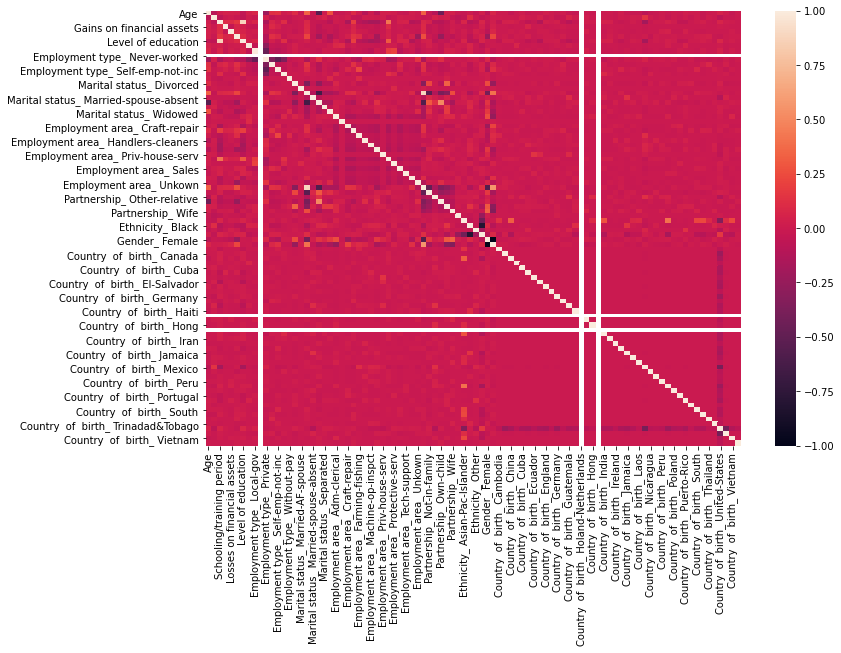

In [1137]:
#finding feature correlation (correlation Matrix with Heatmap)

import seaborn as sns
fig_dims = (12,8)
fig,ax = plt.subplots(figsize=(fig_dims))
sns.heatmap(X_train.corr(),ax=ax)
plt.show()



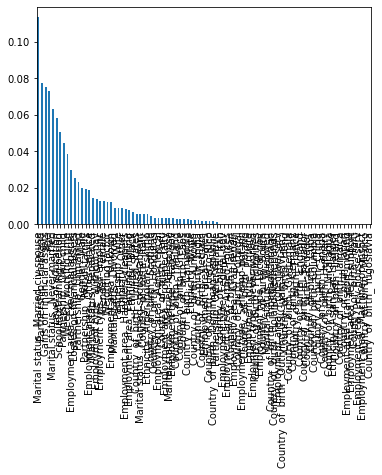

In [1237]:
#Mutual Information gain

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif

mut_info = mutual_info_classif(x, y)
mut_info = pd.Series(mut_info)
mut_info.index = x.columns
mut_info.sort_values(ascending= False, inplace = True)
mut_info.plot.bar()
plt.show()


In [1227]:
#selecting 60 percent of features

selct_feat = SelectPercentile(mutual_info_classif, percentile =60).fit(x, y)
print(x.columns[selct_feat.get_support()])


x_mi = selct_feat.transform(x)


Index(['Age', 'Weighting factor', 'Schooling/training period',
       'Gains on financial assets', 'Losses on financial assets',
       'Weekly working time', 'Level of education',
       'Employment type_ Federal-gov', 'Employment type_ Local-gov',
       'Employment type_ Never-worked', 'Employment type_ Private',
       'Employment type_ Self-emp-inc', 'Employment type_ Without-pay',
       'Marital status_ Divorced', 'Marital status_ Married-AF-spouse',
       'Marital status_ Married-civ-spouse',
       'Marital status_ Married-spouse-absent',
       'Marital status_ Never-married', 'Marital status_ Widowed',
       'Employment area_ Adm-clerical', 'Employment area_ Exec-managerial',
       'Employment area_ Handlers-cleaners', 'Employment area_ Other-service',
       'Employment area_ Protective-serv', 'Employment area_ Tech-support',
       'Employment area_ Unkown', 'Partnership_ Husband',
       'Partnership_ Not-in-family', 'Partnership_ Own-child',
       'Partnership_ Unmar

In [1228]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
                             classification_report, confusion_matrix)

#k_folds = KFold(5, random_state = 1)  #default 5 folds

Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
AUC = []

In [1229]:
#Building models 

from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent',random_state = 1)
Model.append("Dummy Classifier")
Accuracy.append(cross_val_score(clf, x_mi, y, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, x_mi, y, scoring='precision').mean())
Recall.append(cross_val_score(clf, x_mi, y, scoring='recall').mean())
F1.append(cross_val_score(clf, x_mi, y, scoring='f1').mean())
AUC.append(cross_val_score(clf, x_mi, y, scoring='roc_auc').mean())


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1230]:
from sklearn.linear_model import LogisticRegression

#Grid search to tuning hyperparameters 

lr = LogisticRegression(max_iter = 10000)
param_grid = {'C': [0.1, 0.4, 0.7, 1, 4, 7, 10]}
grid_lr = GridSearchCV(lr, param_grid).fit(x_mi, y)
print("Logistic Regression: ", grid_lr.best_score_, grid_lr.best_params_)



Logistic Regression:  0.840768968968969 {'C': 10}


In [1231]:
from sklearn.linear_model import LogisticRegression
#default num of folds is 5

clf = grid_lr.best_estimator_
Model.append("Logistic Regression")
Accuracy.append(cross_val_score(clf, x_mi, y, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, x_mi, y, scoring='precision').mean())
Recall.append(cross_val_score(clf, x_mi, y, scoring='recall').mean())
F1.append(cross_val_score(clf, x_mi, y, scoring='f1').mean())
AUC.append(cross_val_score(clf, x_mi, y, scoring='roc_auc').mean())


In [1232]:
from sklearn.svm import SVC
svm = SVC()
param_grid = {'C': [.001, 0.1, 0.4, 0.7, 1, 4, 7, 10],
              'kernel': ['linear', 'rbf','poly']}
grid_svm = GridSearchCV(svm, param_grid).fit(x_mi, y)
print("SVC: ", grid_svm.best_score_, grid_svm.best_params_)



SVC:  0.8439683683683684 {'C': 4, 'kernel': 'linear'}


In [1233]:
from sklearn.svm import SVC
clf = grid_svm.best_estimator_
Model.append("SVC")
Accuracy.append(cross_val_score(clf, x_mi, y, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, x_mi, y, scoring='precision').mean())
Recall.append(cross_val_score(clf, x_mi, y, scoring='recall').mean())
F1.append(cross_val_score(clf, x_mi, y, scoring='f1').mean())
AUC.append(cross_val_score(clf, x_mi, y, scoring='roc_auc').mean())

In [1234]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
param_grid = {'n_estimators': [250,300,350,400,450,500,550],
             'max_depth': [5, 10, 15, 20, 25, 30, None]}
grid_rfc = GridSearchCV(rfc, param_grid).fit(x_mi, y)
print("RFC: ", grid_rfc.best_score_, grid_rfc.best_params_)

RFC:  0.852173173173173 {'max_depth': 10, 'n_estimators': 250}


In [1235]:
from sklearn.ensemble import RandomForestClassifier
clf = grid_rfc.best_estimator_
Model.append("Random Forest Classifier")
Accuracy.append(cross_val_score(clf,x_mi, y, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, x_mi, y, scoring='precision').mean())
Recall.append(cross_val_score(clf, x_mi, y, scoring='recall').mean())
F1.append(cross_val_score(clf, x_mi, y, scoring='f1').mean())
AUC.append(cross_val_score(clf, x_mi, y, scoring='roc_auc').mean())

In [1236]:
#building evaluation table 

eval_table = pd.DataFrame({'Model': Model, 
                           'Accuracy': Accuracy, 
                           'Precision': Precision, 
                           'Recall': Recall,
                           'F1 Score': F1, 
                           'AUC': AUC})
eval_table 


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Dummy Classifier,0.755751,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.840769,0.717390,0.578190,0.639226,0.896307
2,SVC,0.843968,0.737569,0.562613,0.637114,0.893249
3,Random Forest Classifier,0.852173,0.780254,0.551154,0.645362,0.906092


In [1202]:
#predicting income group for the remaining 25000 samples 

X_UNBEKANNT = selct_feat.transform(for_predict.drop(['Income'],1))
Y_UNBEKANNT = for_predict['Income']


model_rfc = RandomForestClassifier(max_depth=10,n_estimators =550, random_state=1)
model_rfc.fit(x_mi,y)

RandomForestClassifier(max_depth=10, n_estimators=550, random_state=1)

In [1203]:
TARGETS=model_rfc.predict(X_UNBEKANNT)
new_tar=pd.DataFrame(data=TARGETS,columns=['PRED'])
UNBEKANNT=np.concatenate((X_UNBEKANNT,new_tar.values),1)

In [1204]:
COLUMNS=x.columns[selct_feat.get_support()]
COLUMNS=np.append(COLUMNS,'PRED')

In [1205]:
UNBEKANNT=pd.DataFrame(data=UNBEKANNT,columns=COLUMNS)

UNBEKANNT

,Age,Weighting factor,Schooling/training period,Gains on financial assets,Losses on financial assets,Weekly working time,Level of education,Employment type_ Federal-gov,Employment type_ Private,Employment type_ Self-emp-inc,...,Country of birth_ Ireland,Country of birth_ Italy,Country of birth_ Jamaica,Country of birth_ Laos,Country of birth_ Outlying-US(Guam-USVI-etc),Country of birth_ Peru,Country of birth_ Philippines,Country of birth_ Trinadad&Tobago,Country of birth_ Vietnam,PRED
0,0.410959,0.045736,0.933333,0.278283,0.000000,0.500000,10.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.520548,0.094531,0.800000,0.000000,0.365014,0.377551,14.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.123288,0.081754,0.533333,0.050131,0.000000,0.397959,9.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.150685,0.101458,0.533333,0.000000,0.000000,0.397959,9.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260274,0.033999,0.533333,0.000000,0.000000,0.397959,9.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.178082,0.029337,0.866667,0.000000,0.000000,0.448980,15.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.424658,0.072796,0.666667,0.000000,0.000000,0.561224,11.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24997,0.602740,0.105311,0.600000,0.000000,0.000000,0.346939,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0.328767,0.116878,0.533333,0.000000,0.000000,0.397959,9.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1206]:
UNBEKANNT['PRED'].unique()

array([1., 0.])